# ENTREGABLE DE DIMENSIONALIDAD / CLUSTERING

In [2]:
import pandas as pd
import numpy as np


In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [4]:
# Quitamos el label ya que en este caso seria un problema de clustering
data_train = data_train.drop('genre', axis=1)

In [5]:
data_train.shape

(33844, 22)

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33844 entries, 0 to 33843
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      33844 non-null  float64
 1   energy            33844 non-null  float64
 2   key               33844 non-null  int64  
 3   loudness          33844 non-null  float64
 4   mode              33844 non-null  int64  
 5   speechiness       33844 non-null  float64
 6   acousticness      33844 non-null  float64
 7   instrumentalness  33844 non-null  float64
 8   liveness          33844 non-null  float64
 9   valence           33844 non-null  float64
 10  tempo             33844 non-null  float64
 11  type              33844 non-null  object 
 12  id                33844 non-null  object 
 13  uri               33844 non-null  object 
 14  track_href        33844 non-null  object 
 15  analysis_url      33844 non-null  object 
 16  duration_ms       33844 non-null  int64 

In [7]:
data_train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,Unnamed: 0,title,Id
0,0.896,0.691,1,-7.403,1,0.369,0.01180,0.000,0.0883,0.6650,...,1lKQIxQDnLKoFhNWwMFiho,spotify:track:1lKQIxQDnLKoFhNWwMFiho,https://api.spotify.com/v1/tracks/1lKQIxQDnLKo...,https://api.spotify.com/v1/audio-analysis/1lKQ...,152398,4,First Day Out,NaN,NaN,6863
1,0.432,0.962,2,-5.834,1,0.130,0.00193,0.162,0.6300,0.1240,...,6xyHjM4VecIRZDUldiiBA5,spotify:track:6xyHjM4VecIRZDUldiiBA5,https://api.spotify.com/v1/tracks/6xyHjM4VecIR...,https://api.spotify.com/v1/audio-analysis/6xyH...,219085,4,NaN,8997.0,Uplifting | Trance,30452
2,0.686,0.692,0,-5.573,0,0.323,0.48200,0.000,0.1690,0.6490,...,1rZvU5sb2E8LuJTAqEdAiw,spotify:track:1rZvU5sb2E8LuJTAqEdAiw,https://api.spotify.com/v1/tracks/1rZvU5sb2E8L...,https://api.spotify.com/v1/audio-analysis/1rZv...,269357,3,Funky Ho'$,NaN,NaN,8111
3,0.441,0.891,7,-2.873,0,0.037,0.01770,0.815,0.1840,0.0353,...,1TDjiNBekgMInzoNZxYi0D,spotify:track:1TDjiNBekgMInzoNZxYi0D,https://api.spotify.com/v1/tracks/1TDjiNBekgMI...,https://api.spotify.com/v1/audio-analysis/1TDj...,319851,4,NaN,15264.0,Liquid Drum & Bass,36665
4,0.376,0.876,4,-2.695,0,0.101,0.03450,0.000,0.1250,0.2500,...,79fspqGOIP7FInu1elXhVX,spotify:track:79fspqGOIP7FInu1elXhVX,https://api.spotify.com/v1/tracks/79fspqGOIP7F...,https://api.spotify.com/v1/audio-analysis/79fs...,222442,4,Miss U,NaN,NaN,4428


In [8]:
data_train.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0,Id
count,33844.000000,33844.000000,33844.000000,33844.000000,33844.000000,33844.000000,33844.000000,33844.000000,33844.000000,33844.000000,33844.000000,33844.000000,33844.000000,16662.000000,33844.000000
mean,0.639616,0.762889,5.383968,-6.468434,0.548989,0.136532,0.095660,0.285237,0.214269,0.357271,147.408835,251280.702872,3.973171,10446.055936,21173.144516
std,0.156316,0.183364,3.660711,2.921052,0.497602,0.126349,0.170686,0.371730,0.176104,0.233625,23.837533,103325.799073,0.268050,6043.168677,12177.426250
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000,0.000000
25%,0.525000,0.632000,1.000000,-8.159000,0.000000,0.049100,0.001690,0.000000,0.099600,0.161000,129.862500,179939.750000,4.000000,5240.250000,10661.750000
50%,0.646000,0.803000,6.000000,-6.246000,1.000000,0.075400,0.016400,0.006150,0.135000,0.321000,144.964500,224813.000000,4.000000,10422.500000,21193.000000
75%,0.767000,0.922000,9.000000,-4.524000,1.000000,0.193000,0.106000,0.726250,0.294000,0.522000,161.145000,301925.500000,4.000000,15655.750000,31686.250000
max,0.988000,1.000000,11.000000,3.108000,1.000000,0.944000,0.987000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000,42304.000000


In [9]:
data_train.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
song_name           16667
Unnamed: 0          17182
title               17182
Id                      0
dtype: int64

# Feature Selection

### Aplicamos el método de la varianza

In [10]:
# Pasamos todas las variables a numericas con LabelEncoder

from sklearn.preprocessing import LabelEncoder

# Crear una copia del dataset para no modificar el original
data_train_num = data_train.copy()

# Seleccionar las columnas categóricas
cat_cols = data_train_num.select_dtypes(include=['object']).columns

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada columna categórica
for col in cat_cols:
    data_train_num[col] = label_encoder.fit_transform(data_train_num[col])

# Verificar el resultado
print(data_train_num.head())


   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.896   0.691    1    -7.403     1        0.369       0.01180   
1         0.432   0.962    2    -5.834     1        0.130       0.00193   
2         0.686   0.692    0    -5.573     0        0.323       0.48200   
3         0.441   0.891    7    -2.873     0        0.037       0.01770   
4         0.376   0.876    4    -2.695     0        0.101       0.03450   

   instrumentalness  liveness  valence  ...     id    uri  track_href  \
0             0.000    0.0883   0.6650  ...   6541   6541        6541   
1             0.162    0.6300   0.1240  ...  26358  26358       26358   
2             0.000    0.1690   0.6490  ...   6920   6920        6920   
3             0.815    0.1840   0.0353  ...   5450   5450        5450   
4             0.000    0.1250   0.2500  ...  27071  27071       27071   

   analysis_url  duration_ms  time_signature  song_name  Unnamed: 0  title  \
0          6541       152398    

In [11]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
data_train_reduced = sel.fit_transform(data_train_num)

In [12]:
# Vemos que características se han eliminado

# Obtener los nombres de las columnas que quedaron después de aplicar el filtro

selected_features = data_train_num.columns[sel.get_support()]
print("Características seleccionadas:", selected_features.tolist())

# Obtener las columnas eliminadas
removed_features = data_train_num.columns[~sel.get_support()]
print("Características eliminadas por baja varianza:", removed_features.tolist())



Características seleccionadas: ['key', 'loudness', 'mode', 'tempo', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'song_name', 'Unnamed: 0', 'title', 'Id']
Características eliminadas por baja varianza: ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'type', 'time_signature']


 ### Aplicamos ahora una matriz de correlacion

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = data_train_num.corr()


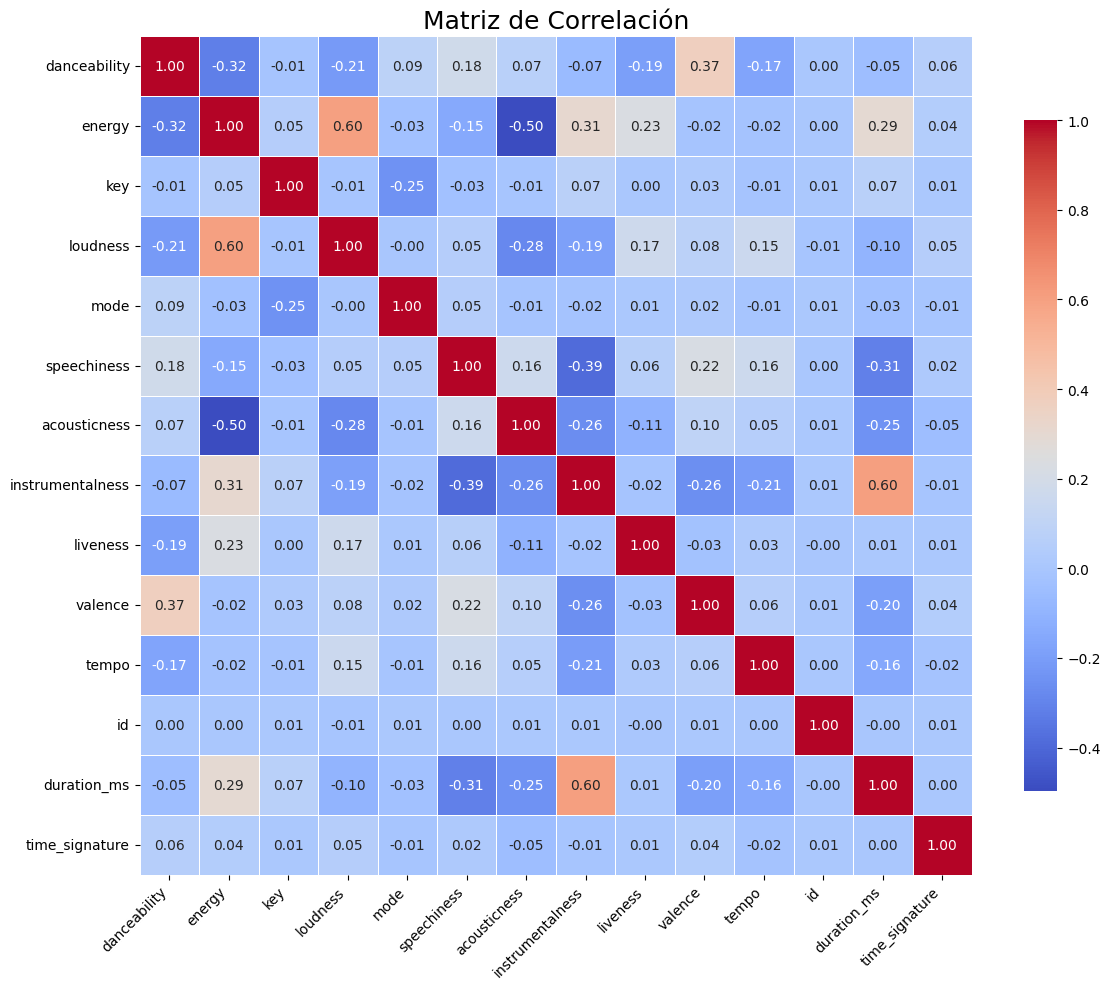

In [14]:

# Eliminar columnas irrelevantes que no aportan a la correlación
columns_to_drop = ['Id', 'uri', 'track_href', 'analysis_url', 'type', 'song_name', 'title', 'Unnamed: 0']
data_cleaned = data_train_num.drop(columns=columns_to_drop, errors='ignore')

# Calcular la matriz de correlación solo con variables numéricas
correlation_matrix = data_cleaned.corr()

# Ajustar el tamaño de la figura y las etiquetas
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 10})

# Personalizar el diseño del gráfico
plt.title('Matriz de Correlación', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


Viendo la matriz de correlacion podemos ver la relacion tanto directa como indirecta que existe entre las variables, de esta forma podríamos decidir que si alguna de ellas está muy relacionada, se podrían aplicar otras técnicas de dimensionalidad para reducir el numero de features. A simple vista la que mauyor relacion tiene es la energia con el volumen (relación directa) o con el género, de manera indirecta tambien tiene una relación con la acústica. Pero ninguna tiene suficiente relación como para eliminar esta feature de manera clara.

### PCA

Varianza explicada por los componentes: [0.18578192 0.13740282 0.09504701 0.08886375 0.07153325 0.06934377
 0.06667982 0.06043915]


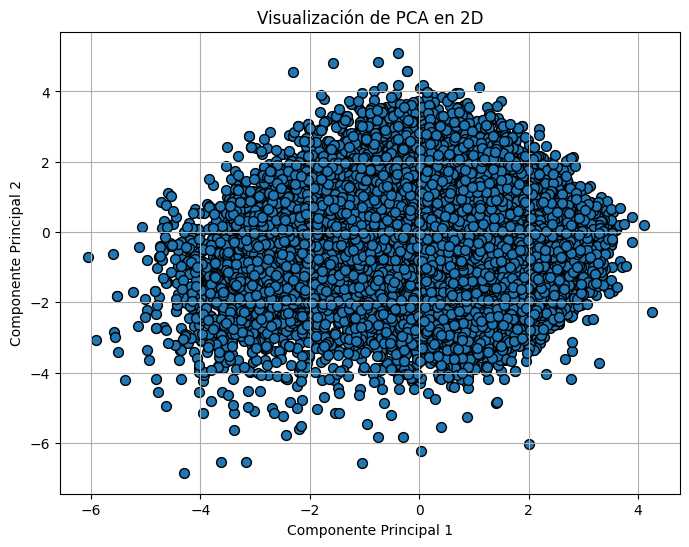

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd


# 1. Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)

# 2. Aplicar PCA
pca = PCA(n_components=8)  
X_pca = pca.fit_transform(X_scaled)

# 3. Ver la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por los componentes: {explained_variance}")

# 4. Visualización de los datos reducidos a 2 dimensiones
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='k', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de PCA en 2D')
plt.grid(True)
plt.show()


### VARIANAZA EXPLICADA POR COMPONENTES, PCA

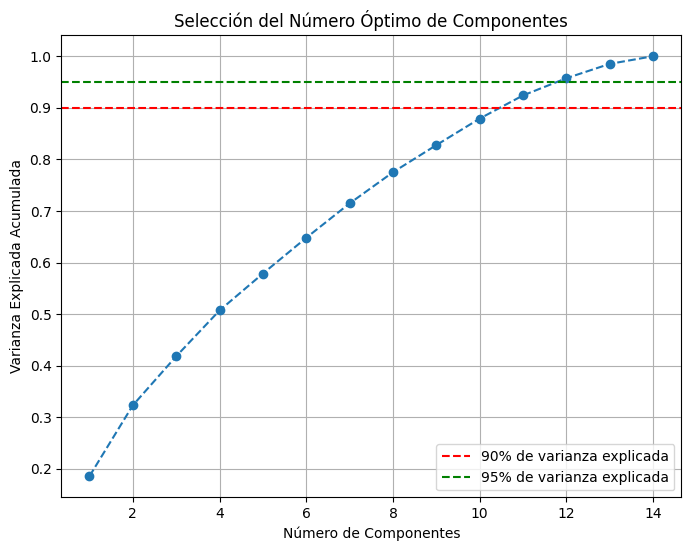

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)

# Aplicar PCA sin limitar el número de componentes
pca = PCA()
pca.fit(X_scaled)

# Calcular la varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% de varianza explicada')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% de varianza explicada')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Selección del Número Óptimo de Componentes')
plt.legend()
plt.grid(True)
plt.show()


El objetivo de esta gráfica es ver si es posible reducir la dimensionalidad, manteniendo la mayor cantidad posible de información. Se puede elegir un numero de componentes que se encuentre entre el umbral del 90% y 95%. Obeservando la gráfica podríamos ver que nos podríamos quedar con 10-12 características sin perder mucha información

### T-SNE

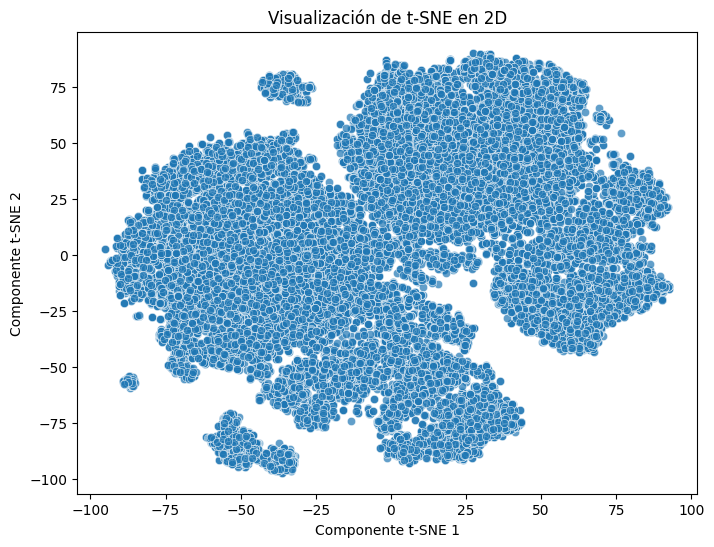

In [24]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aplicar t-SNE con 2 dimensiones
tsne = TSNE(n_components=2, perplexity=50, random_state=42, init='pca', learning_rate='auto')
X_tsne_2d = tsne.fit_transform(X_scaled)

# Convertir a DataFrame
tsne_df = pd.DataFrame(X_tsne_2d, columns=['TSNE_1', 'TSNE_2'])

# Graficar sin etiquetas
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE_1', y='TSNE_2', data=tsne_df, alpha=0.7)
plt.title("Visualización de t-SNE en 2D")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.show()


Tras probar con diferentes valores para el perplexity, el que mejor resultado nos da es un valor de 50. Aun así no se puede apreciar de la mejor manera los diferentes tipos de cluster que existen

### U-MAP

c:\Users\eduab\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\eduab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\eduab\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


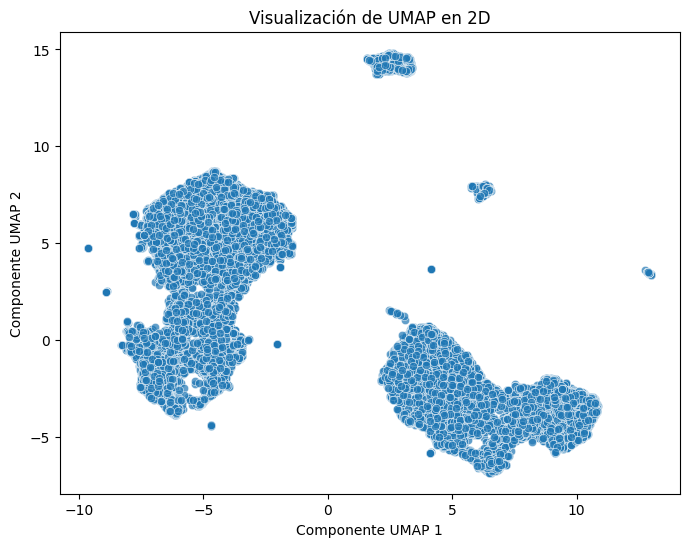

In [22]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aplicar UMAP con 2 componentes
umap_2d = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
X_umap_2d = umap_2d.fit_transform(X_scaled)

# Convertir a DataFrame
umap_df = pd.DataFrame(X_umap_2d, columns=['UMAP_1', 'UMAP_2'])

# Graficar los datos
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP_1', y='UMAP_2', data=umap_df, alpha=0.7)
plt.title("Visualización de UMAP en 2D")
plt.xlabel("Componente UMAP 1")
plt.ylabel("Componente UMAP 2")
plt.show()


Tras ver este gráfico podemos apreciar que pueden haber 5 grupos diferentes. O en otro caso podrían haber 7 grupos, donde como se puede ver en la grafica los dos grandes grupos puede ser que a su vez se dividan en dos más y que estos géneros musicales sean muy parecidos entre ellos. He probado con diferentes valores de número de vecinos, pero no he podido obtener un mejor resultado que este